## Source is plotly

In [1]:
import plotly.graph_objects as go
import urllib, json

url = 'https://raw.githubusercontent.com/plotly/plotly.js/master/test/image/mocks/sankey_energy.json'
response = urllib.request.urlopen(url)
data = json.loads(response.read())

In [2]:
import pprint

In [3]:
# override gray link colors with 'source' colors
opacity = 0.4
# change 'magenta' to its 'rgba' value to add opacity
data['data'][0]['node']['color'] = ['rgba(255,0,255, 0.8)' if color == "magenta" else color for color in data['data'][0]['node']['color']]
data['data'][0]['link']['color'] = [data['data'][0]['node']['color'][src].replace("0.8", str(opacity)) for src in data['data'][0]['link']['source']]

In [9]:
data

{'data': [{'type': 'sankey',
   'domain': {'x': [0, 1], 'y': [0, 1]},
   'orientation': 'h',
   'valueformat': '.0f',
   'valuesuffix': 'TWh',
   'node': {'pad': 15,
    'thickness': 15,
    'line': {'color': 'black', 'width': 0.5},
    'label': ["Agricultural 'waste'",
     'Bio-conversion',
     'Liquid',
     'Losses',
     'Solid',
     'Gas',
     'Biofuel imports',
     'Biomass imports',
     'Coal imports',
     'Coal',
     'Coal reserves',
     'District heating',
     'Industry',
     'Heating and cooling - commercial',
     'Heating and cooling - homes',
     'Electricity grid',
     'Over generation / exports',
     'H2 conversion',
     'Road transport',
     'Agriculture',
     'Rail transport',
     'Lighting & appliances - commercial',
     'Lighting & appliances - homes',
     'Gas imports',
     'Ngas',
     'Gas reserves',
     'Thermal generation',
     'Geothermal',
     'H2',
     'Hydro',
     'International shipping',
     'Domestic aviation',
     'Internation

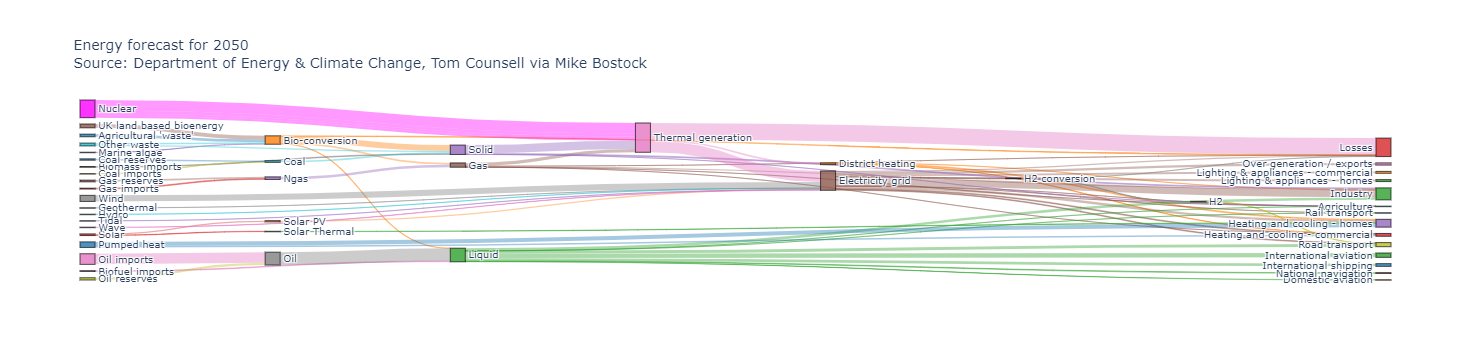

In [6]:
fig = go.Figure(data=[go.Sankey(
    valueformat = ".0f",
    valuesuffix = "TWh",
    # Define nodes
    node = dict(
      pad = 15,
      thickness = 15,
      line = dict(color = "black", width = 0.5),
      label =  data['data'][0]['node']['label'],
      color =  data['data'][0]['node']['color']
    ),
    # Add links
    link = dict(
      source =  data['data'][0]['link']['source'],
      target =  data['data'][0]['link']['target'],
      value =  data['data'][0]['link']['value'],
      label =  data['data'][0]['link']['label'],
      color =  data['data'][0]['link']['color']
))])

fig.update_layout(title_text="Energy forecast for 2050<br>Source: Department of Energy & Climate Change, Tom Counsell via <a href='https://bost.ocks.org/mike/sankey/'>Mike Bostock</a>",
                  font_size=10)

In [27]:
label =  data['data'][0]['node']['label']    
source =  data['data'][0]['link']['source']
target =  data['data'][0]['link']['target']

In [32]:
for i in range(10,15):
    print(label[source[i]],"->",label[target[i]], source[i], target[i])

District heating -> Industry 11 12
District heating -> Heating and cooling - commercial 11 13
District heating -> Heating and cooling - homes 11 14
Electricity grid -> Over generation / exports 15 16
Electricity grid -> Heating and cooling - homes 15 14


In [94]:
NAMES = ["Stephan", "Lukas", "Tobias", "Micha"]
PROJECTS = ["Ebener", "Leitmittel", "Diss", "Plansee", "Voest"]

SOURCE_TARGETS = {"Stephan" : { "src":0, "trgt":[4,5], "partition":[0.9,0.1]}, 
                  "Lukas" : {"src":1, "trgt":[4, 5, 6], "partition":[0.2, 0.1, 0.7]},
                  "Tobias" : {"src": 2, "trgt" : [5], "partition":[1]},
                  "Micha" : {"src": 3, "trgt": [5, 7, 8], "partition":[0.1, 0.55, 0.35]},
                 }

In [121]:
import itertools
import numpy as np

In [96]:
sources = [v["src"] for v in list(SOURCE_TARGETS.values()) for v1 in v["trgt"]]
targets = list(itertools.chain(*[v["trgt"] for v in list(SOURCE_TARGETS.values())]))
values = list(itertools.chain(*[v["partition"] for v in list(SOURCE_TARGETS.values())]))

In [178]:
# https://www.google.com/search?client=firefox-b-d&q=%23e41a1c for HEX color codes
color_list = [""] * len(NAMES) + ['rgba(228, 26, 28, 0.5)', 'rgba(127, 156, 250, 0.7)', 'rgba(228, 26, 2, 0.5)', 'rgba(106, 250, 2, 0.5)', 'rgba(16, 2, 217, 0.5)']
colors = [color_list[t] for t in targets]

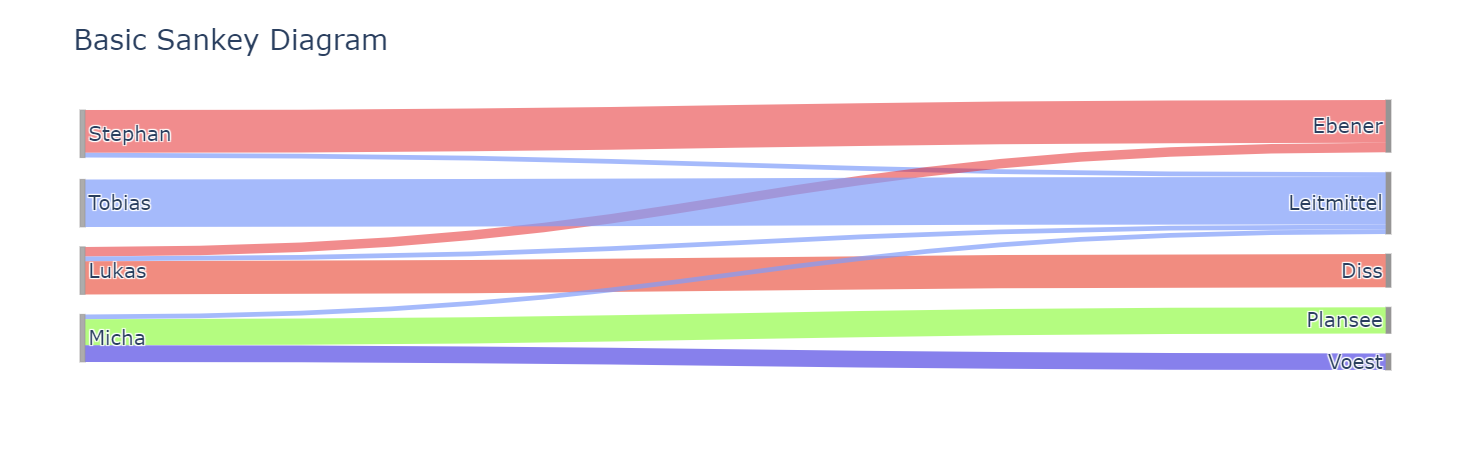

In [183]:
import plotly.graph_objects as go

fig = go.Figure(data=[go.Sankey(
    arrangement = "snap", # other alternatives: freeform, perpendicular
    node = dict(
      pad = 20,
      thickness = 5,
      line = dict(color = "#969595", width = 0.5),
      label = NAMES + PROJECTS,
      color = ["#adacac"]*len(NAMES) + ["#969595"]*len(PROJECTS),
    ),
    link = dict(
        source = sources,
        target = targets,
        value = values,
        color = colors,
  ))])

fig.update_layout(title_text="Basic Sankey Diagram", font_size=20)
fig.show()